<a href="https://colab.research.google.com/github/pk2971/Mall-Customer-Clustering/blob/main/Mall_customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mall customer Clustering using K-Means and DBSCAN algorithms**

Author: Praharshita Kaithepalli(pk2971@rit.edu)

DBSCAN youtube tutorial :https://www.youtube.com/watch?v=C3r7tGRe2eI

Data source:https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv


In [ ]:
import pandas as pd
import io
import csv


In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Using the elbow visualizer to find the number of clusters needed for the algorithm

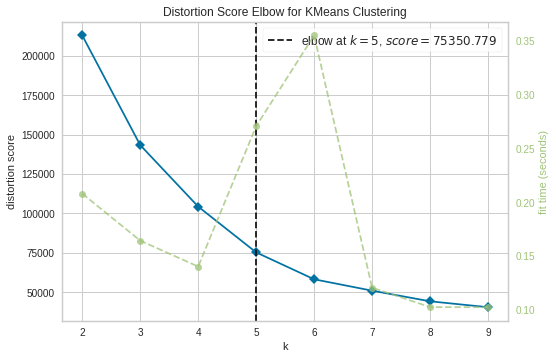

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 


model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
#plt.show()

We will use 5 and 6 as the number of clsuters needed while fitting the model.

In [ ]:
kmeans5=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(X)
#kmeans5.fit(X)
kmeans5.labels_
kmeans5Visualize=X.copy()
kmeans5Visualize.loc[:,'Cluster']=kmeans5.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


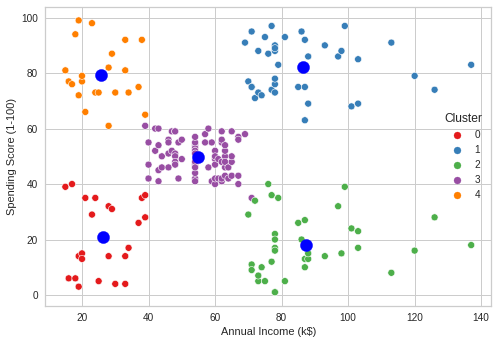

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=kmeans5Visualize,
                hue='Cluster', palette='Set1', legend='full')
plt.scatter(kmeans5.cluster_centers_[:, 1], kmeans5.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


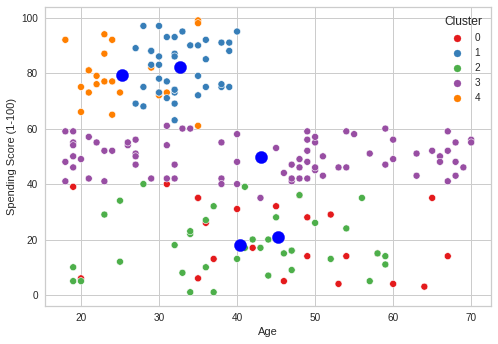

In [ ]:
scat_2 = sns.scatterplot('Age', 'Spending Score (1-100)', data=kmeans5Visualize,
                hue='Cluster', palette='Set1', legend='full')
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')


Trying 6 clusters in hopes of getting better clustering of the data.

In [ ]:
kmeans6=KMeans(n_clusters=6,init='k-means++',random_state=42).fit(X)
#kmeans5.fit(X)
kmeans6.labels_
kmeans6Visualize=X.copy()
kmeans6Visualize.loc[:,'Cluster']=kmeans6.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


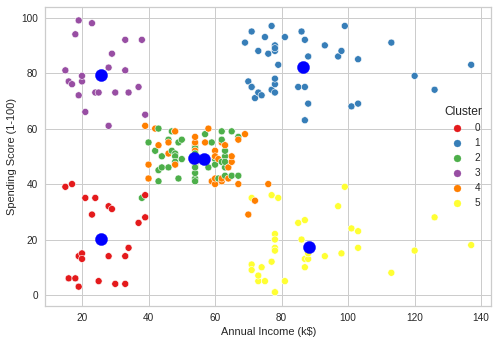

In [ ]:
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=kmeans6Visualize,
                hue='Cluster', palette='Set1', legend='full')
plt.scatter(kmeans6.cluster_centers_[:, 1], kmeans6.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


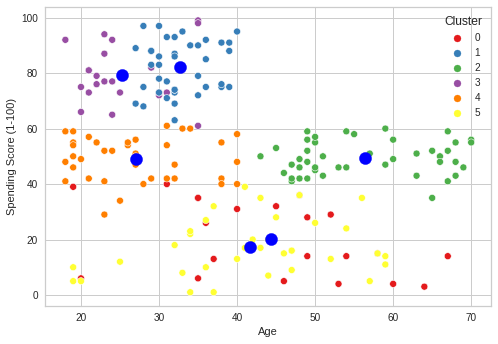

In [ ]:
scat_2 = sns.scatterplot('Age', 'Spending Score (1-100)', data=kmeans6Visualize,
                hue='Cluster', palette='Set1', legend='full')
plt.scatter(kmeans6.cluster_centers_[:, 0], kmeans6.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')


K-Means algorithm did not show a distinct cluster seperation in terms of of customer age for both n_clusters=5 and n_clusters=6.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
#from matplotlib import pyplot as plt

Find the epsilon value for the DBSCAN algorithm.

Source: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Used NearestNeighbors algorithm to fit the data and plot the k-distance elbow plot to find the Epsilon value in the DBSCAN algorithm.

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

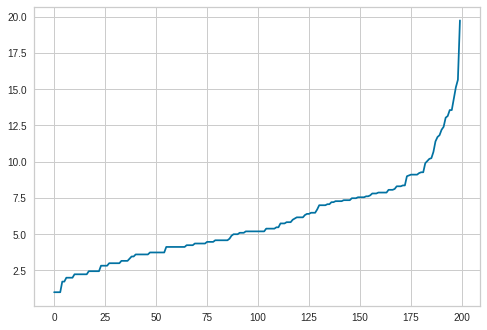

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Based of the graph we will start checking the Epislon value from 10 and increment it if needed.

In [ ]:
dbscan1= DBSCAN(eps=10, min_samples=4).fit(X)

In [ ]:
dbscan1.labels_
dbscan1Visualize=X.copy()
dbscan1Visualize.loc[:,'Cluster']=dbscan1.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


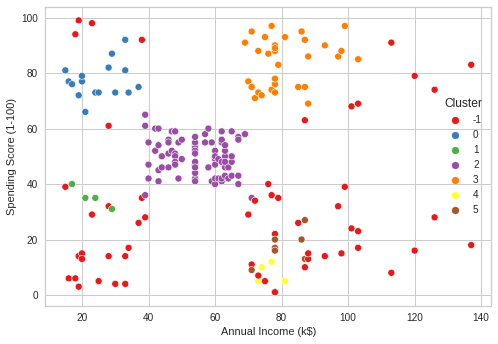

In [ ]:
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=dbscan1Visualize,
                hue='Cluster', palette='Set1', legend='full')
#plt.scatter(dbscan1.cluster_centers_[:, 1], dbscan1.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


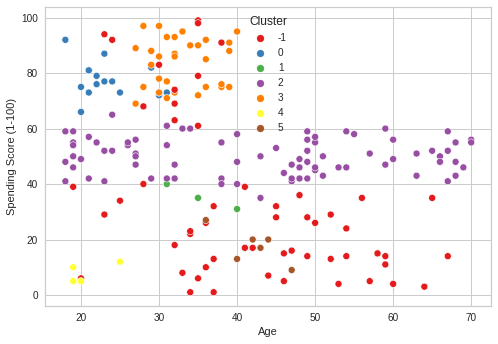

In [ ]:
scat_2 = sns.scatterplot('Age', 'Spending Score (1-100)', data=dbscan1Visualize,
                hue='Cluster', palette='Set1', legend='full')
#plt.scatter(dbscan1.cluster_centers_[:, 0], dbscan1.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')


There is no proper clustering in both of the graphs. Increasing the epsilon value to 12.5 to hopefully produce better results.

In [ ]:
dbscan2= DBSCAN(eps=12.5, min_samples=4).fit(X)

In [ ]:
dbscan2.labels_
dbscan2Visualize=X.copy()
dbscan2Visualize.loc[:,'Cluster']=dbscan2.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


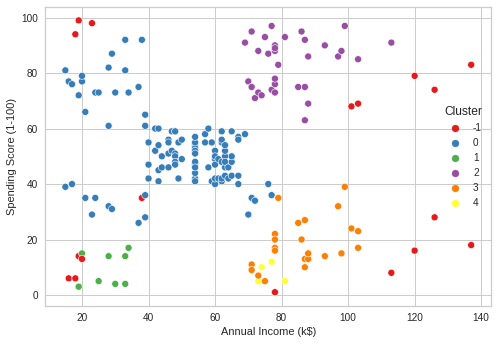

In [ ]:
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=dbscan2Visualize,
                hue='Cluster', palette='Set1', legend='full')
#plt.scatter(dbscan2.cluster_centers_[:, 1], dbscan2.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


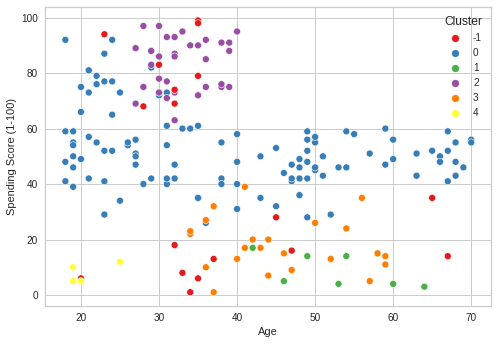

In [ ]:
scat_2 = sns.scatterplot('Age', 'Spending Score (1-100)', data=dbscan2Visualize,
                hue='Cluster', palette='Set1', legend='full')
#plt.scatter(dbscan1.cluster_centers_[:, 0], dbscan1.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')


Both eps=10 and eps=12.5 is producing graphs with a lot of outliers(data points = -1). Data points also do not meet requirement to be a proper clusters.

Final thoughts: Clearly DBSCAN did not generate proper clusters maybe due to the density of the clusters. 
We had good results with K-Means algorithm.